In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import copy 
import numpy as np
# 构建有向图对象
Map = nx.Graph()  

In [2]:
import xml.dom.minidom 
# dom = xml.dom.minidom.parse('map_data/interpreter_beijing')
# dom = xml.dom.minidom.parse('map_data/interpreter_shenzhen') 
# dom = xml.dom.minidom.parse('map_data/interpreter_shanghai') 
# dom = xml.dom.minidom.parse('map_data/interpreter_guangzhou') 
# dom = xml.dom.minidom.parse('map_data/interpreter_hangzhou') 
# dom = xml.dom.minidom.parse('map_data/interpreter_chengdu')
dom = xml.dom.minidom.parse('/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/map0.osm') 

root = dom.documentElement 
root 
print(root.nodeName) 
print(root.nodeValue)
print(root.nodeType)
print(root.ELEMENT_NODE) 

osm
None
1
1


In [3]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000

In [4]:
node = root.getElementsByTagName('node') 
print(node[0].nodeName)  

pos_location = {}   # position of all nodes in the graph" to draw the figure 
loc = []

for i in range(len(node)):
    
    ID = node[i].getAttribute('id')
    lat = float(node[i].getAttribute('lat'))  
    lon = float(node[i].getAttribute('lon')) 
#     print(ID, lat, lon) 


    Map.add_node(ID   
          , ID = ID  
          , lat = lat 
          , lon = lon 
          )
    pos_location[ID] = (lon, lat)
    loc.append([lon, lat]) 

node


In [5]:
pos_location['2635434371'][1]

22.4166125

In [6]:
import pandas as pd 
LOC = pd.DataFrame(loc)
LOC.describe() 

,0,1
count,955.000000,955.000000
mean,113.556845,22.391799
std,0.013959,0.008221
min,113.535477,22.365926
25%,113.548516,22.386845
50%,113.553190,22.391409
75%,113.562531,22.397217
max,113.607795,22.416612


In [7]:
# lon1 = Map.node['2635434371']['ID']
len(Map.nodes)

955

In [8]:
way_set = root.getElementsByTagName('way') 
# print(way_set[0].nodeName)   

# for way in way_set: 
#     previous_node = start_node_id = way.getElementsByTagName('nd')[0].getAttribute('ref') 
#     end_node_id = way.getElementsByTagName('nd')[-1].getAttribute('ref')  
#     lon1 = pos_location[previous_node][0]
#     lat1 = pos_location[previous_node][1]
# #     print(previous_node, end_node_id)
#     for sub_node in way.getElementsByTagName('nd'):
#         current_node_id = sub_node.getAttribute('ref')
#         lon2 = pos_location[current_node_id][0]
#         lat2 = pos_location[current_node_id][1]
#         if(current_node_id != start_node_id):
#             Map.add_edge(previous_node, current_node_id
#                        ,way_type = 0, weight = haversine(lon1 ,lat1, lon2 ,lat2)
#                           ) 
#             previous_node = current_node_id
#     print(sub_node.getAttribute('ref')) 

In [9]:
each_way_nodes = 6 # we define each way are no more than 5
ways = []
for way in way_set:
    sub_way = []
    previous_node = start_node_id = way.getElementsByTagName('nd')[0].getAttribute('ref')
    sub_way.append(start_node_id)
    for sub_node in way.getElementsByTagName('nd'):
        current_node_id = sub_node.getAttribute('ref')
        if(current_node_id != start_node_id):
            sub_way.append(current_node_id)
    ways.append(sub_way)

In [10]:
#add edge and delete node
new_ways = []
for i in range(len(ways)):
    new_sub_way = []
    step = int(len(ways[i])/each_way_nodes) + 1
    for j in range(len(ways[i])):
        if j % step == 0:
            new_sub_way.append(ways[i][j])
            
        else:
            if ways[i][j] in Map.nodes():
                Map.remove_node(ways[i][j])
    new_ways.append(new_sub_way)
                


In [11]:
# add edges
for i in range(len(new_ways)):
    previous_node = new_ways[i][0]
    if previous_node not in Map.nodes():
        Map.add_node(previous_node
                     , ID=previous_node
                     , lon=pos_location[previous_node][0]
                     , lat=pos_location[previous_node][1]
                     )
    for j in range(1, len(new_ways[i])):
        current_node = new_ways[i][j]
        if current_node not in Map.nodes():
            Map.add_node(current_node
                     , ID=current_node
                     , lon=pos_location[current_node][0]
                     , lat=pos_location[current_node][1]
                     )
        lon1 = pos_location[previous_node][0]
        lat1 = pos_location[previous_node][1]
        lon2 = pos_location[current_node][0]
        lat2 = pos_location[current_node][1]
        
        Map.add_edge(previous_node, current_node
                             , way_type=0, weight=haversine(lon1, lat1, lon2, lat2)
                             )
        previous_node = current_node_id
        
             

In [12]:
len(Map.nodes)

357

In [13]:
G2 = copy.deepcopy(Map)
subgraphs = max(nx.connected_components(Map), key=len)

for node in Map.nodes:
    if node not in subgraphs:
        G2.remove_node(node)
        
for node in Map.nodes:
    if((Map.nodes[node]['lat'] >= 22.3989 or Map.nodes[node]['lat'] <= 22.3879) and node in G2.nodes):
        G2.remove_node(node) 
    if((Map.nodes[node]['lon'] <= 113.5436 or Map.nodes[node]['lon'] >= 113.5573) and node in G2.nodes):
        G2.remove_node(node)    
    
G3 = nx.to_undirected(G2) 

In [14]:
max(nx.connected_components(Map), key=len)

{'1582763227',
 '1582763310',
 '1582763366',
 '1582763377',
 '1582763388',
 '1661208375',
 '1661208405',
 '1758551832',
 '1789229768',
 '1789229793',
 '1789229814',
 '1789229872',
 '1803777188',
 '1803777210',
 '1803777213',
 '1803777215',
 '1803777218',
 '1803777226',
 '1803777244',
 '1803777246',
 '1803777250',
 '1803777252',
 '1803777253',
 '1803777256',
 '1803777259',
 '1803777262',
 '1803777266',
 '1803777284',
 '1803777294',
 '1803777296',
 '1803777299',
 '1803777302',
 '1803777319',
 '1803777323',
 '1803777329',
 '1803777331',
 '1803777333',
 '1803777335',
 '1803777336',
 '1803777340',
 '1803777341',
 '1803777343',
 '1803777351',
 '1803777353',
 '1803777358',
 '1803777359',
 '1803777362',
 '1803777363',
 '1803777364',
 '1803777365',
 '1803777368',
 '1803777372',
 '1803777374',
 '1803777376',
 '1803777378',
 '1803783210',
 '1803783231',
 '1803783240',
 '1803783242',
 '1816300075',
 '1816300090',
 '1816300094',
 '1816300191',
 '1816300221',
 '1816300223',
 '1816300225',
 '18163002

In [15]:
node_name_idx = []
idx_node_name = {}
idx = -1
for node in G3.nodes:
    idx += 1
    node_name_idx.append(node)
    idx_node_name[node] = idx
    
TG = nx.Graph()
for i in range(len(node_name_idx)):
    TG.add_node(i, lat=G3.nodes[node_name_idx[i]]['lat'], lon=G3.nodes[node_name_idx[i]]['lon'])
# add edges

for edge in G3.edges:
    TG.add_edge(idx_node_name[edge[0]], idx_node_name[edge[1]], weight=G3.edges[edge[0], edge[1]]['weight'])

In [16]:
TG.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162))

In [17]:
TG.edges

EdgeView([(0, 148), (1, 148), (2, 148), (2, 10), (2, 61), (3, 7), (3, 148), (3, 18), (3, 110), (4, 148), (5, 148), (6, 148), (7, 28), (7, 26), (8, 148), (9, 148), (11, 148), (11, 41), (11, 126), (12, 148), (12, 113), (12, 47), (13, 30), (13, 43), (13, 45), (14, 148), (15, 82), (15, 37), (16, 29), (16, 37), (16, 83), (17, 37), (18, 148), (18, 162), (18, 109), (19, 148), (19, 35), (19, 32), (20, 148), (21, 43), (22, 97), (22, 148), (23, 148), (23, 111), (24, 148), (25, 148), (27, 148), (31, 148), (33, 148), (34, 157), (34, 47), (36, 148), (38, 148), (39, 148), (40, 148), (42, 148), (43, 44), (45, 148), (46, 148), (46, 55), (46, 115), (47, 63), (47, 52), (48, 148), (49, 148), (50, 64), (51, 55), (53, 148), (54, 61), (55, 148), (55, 82), (56, 62), (56, 158), (56, 148), (57, 148), (58, 148), (59, 148), (60, 148), (61, 117), (61, 148), (64, 148), (65, 148), (66, 148), (67, 148), (68, 148), (69, 148), (70, 148), (71, 148), (72, 148), (73, 148), (74, 148), (75, 148), (76, 148), (77, 148), (78,

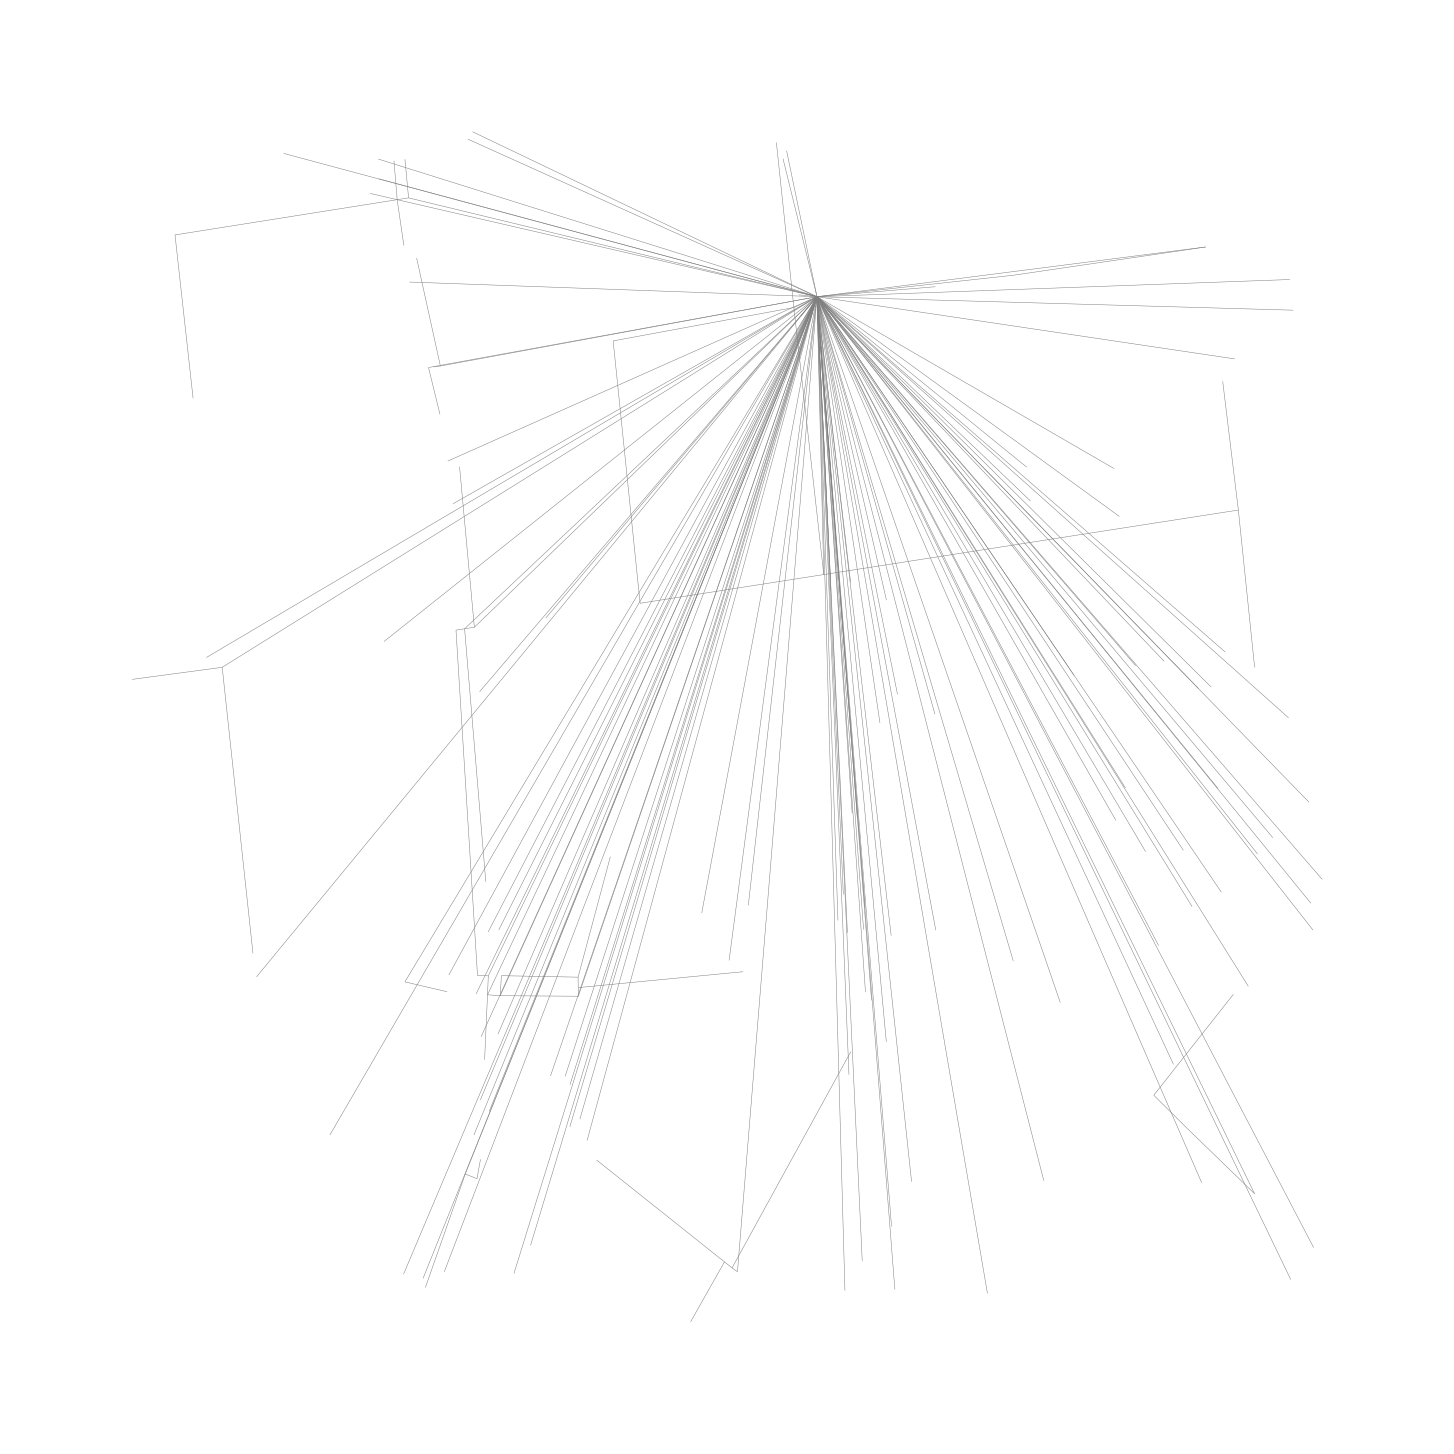

In [18]:
plt.rcParams['figure.figsize'] = (20, 20) # 单位是inches  
nx.draw(G3 
        , pos=pos_location 
#         , with_labels = True
        , node_size = 0.0001    
        , node_color = 'grey' #'#FF8000' #'#6DCAF2' # '#FF8000' # '#6DCAF2' #  '#B9F1E5'   #'grey'   # '#FFBFBF' #  'k' #nodes_col.values()   #'y' 
        , width = 0.5  # default = 1.0 , Line width of edges 
#         , font_size = 4 
#         , font_family = 'arial'
        , edge_color = 'grey'  # b, k, m, g,    
       )  
fig_name = 'zhuhai_keji6lu.jpg'  

plt.savefig(fig_name, dpi=200)  
plt.show()   


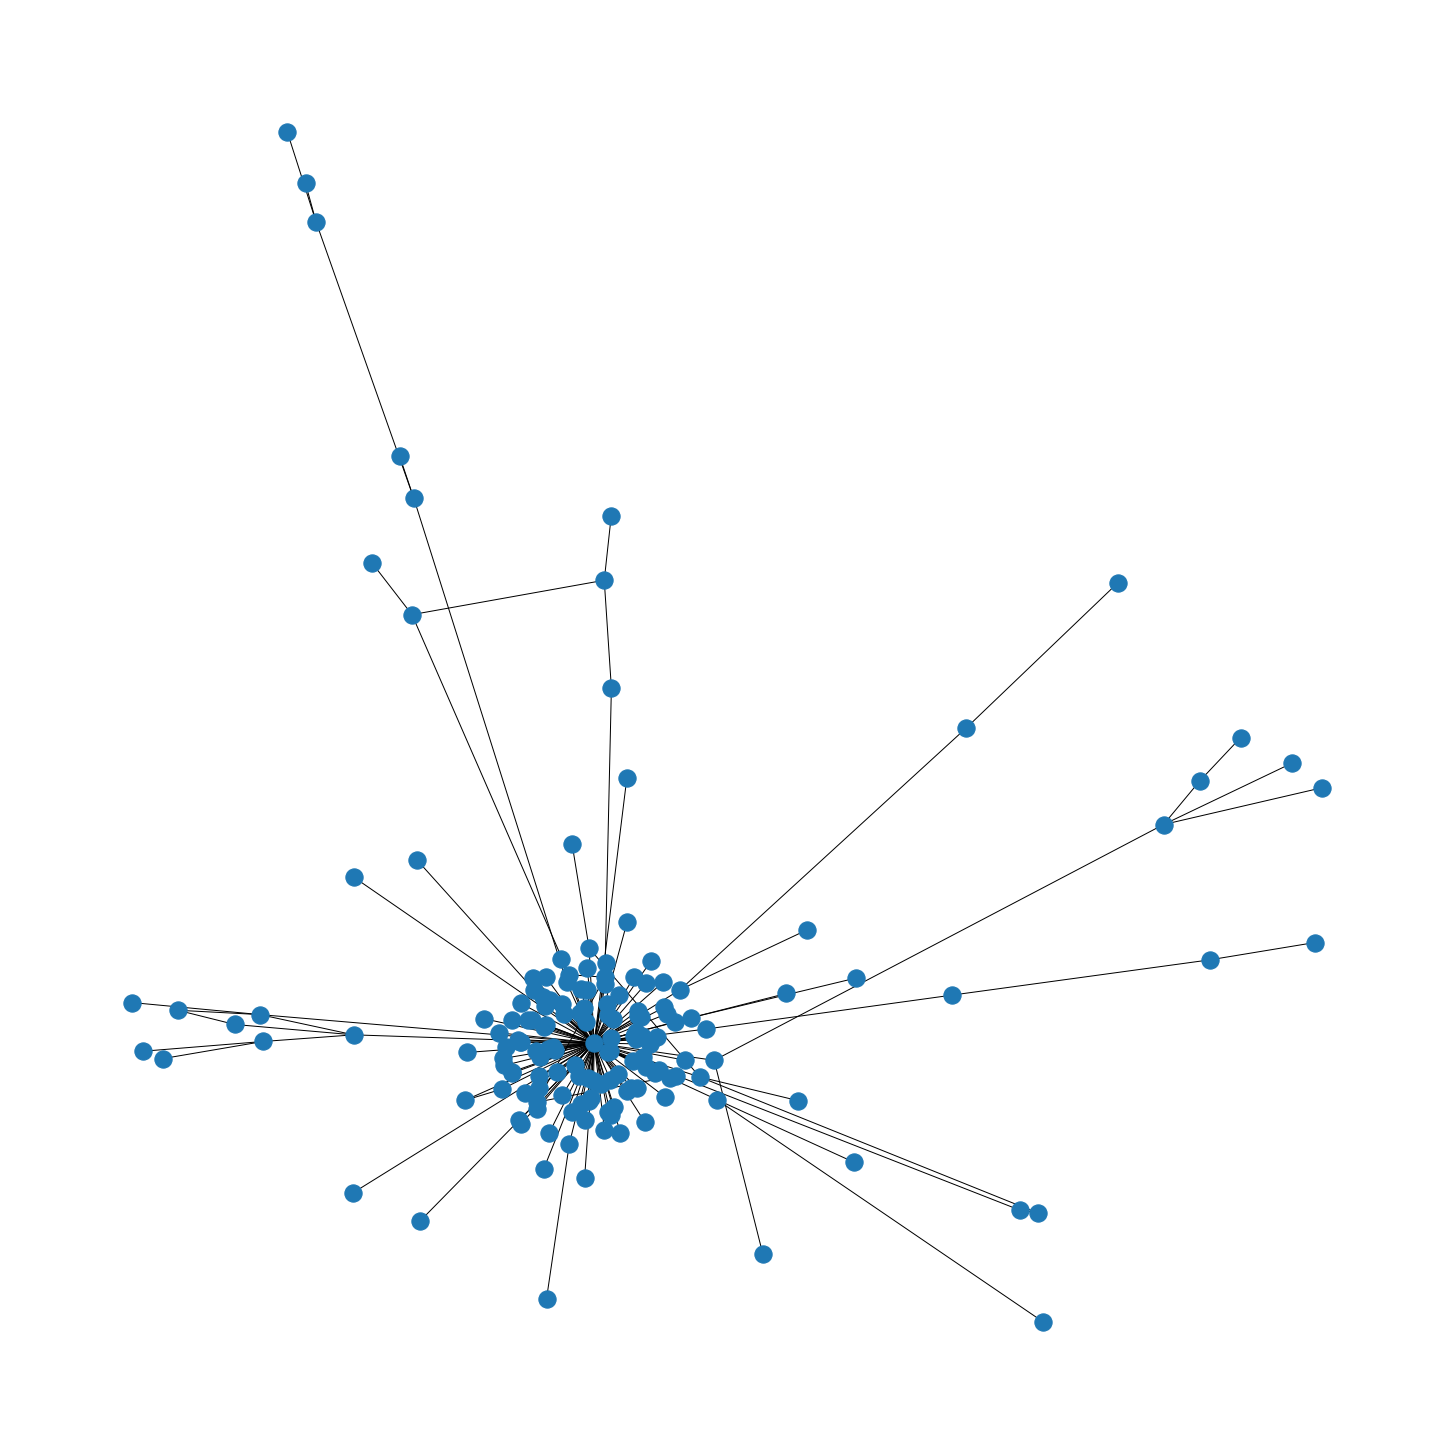

In [19]:
nx.draw(G3)

In [20]:
G3.number_of_nodes()

163

In [21]:
G3.number_of_edges()

171

In [22]:
matrix_G2 = nx.to_numpy_array(G2)

In [23]:
matrix_G2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
matrix_TG = nx.to_numpy_array(TG)

In [25]:
matrix_TG

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
TG.number_of_edges()

171

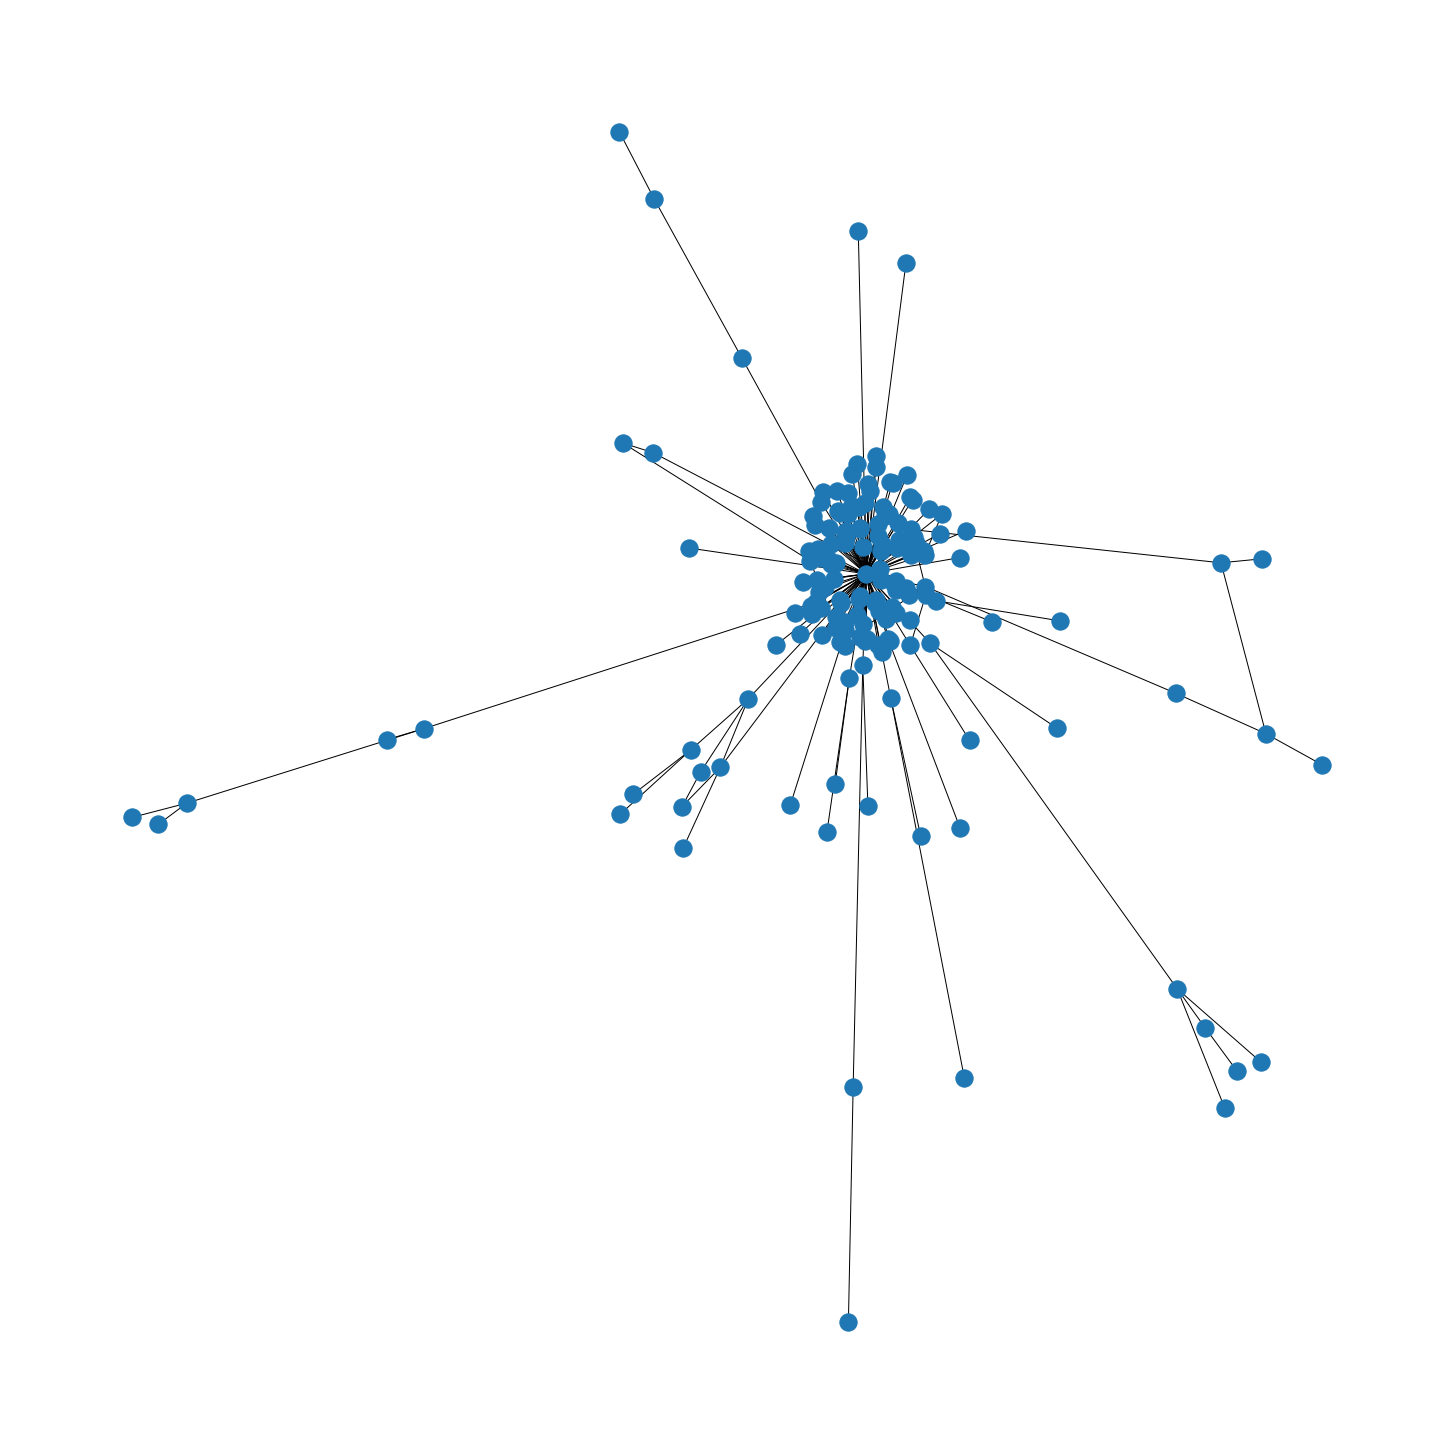

In [27]:
G4 = nx.from_numpy_array(matrix_G2)
nx.draw(G4)

In [28]:
len_path = dict(nx.all_pairs_dijkstra(G4))

In [29]:
# we get top-10 longest point to point then set the nodes are transit stop
edges_distance = {}
transit_node = np.array([])
for (i,j) in G4.edges:
    edges_distance[G4.edges[i,j]['weight']] = [i,j]
#     print(G4.edges[i,j]['weight'])
# sort the edges, get the transit stop node

for i,j in zip(range(10), sorted(edges_distance, reverse = True)):
    transit_node = np.append(transit_node, edges_distance[j])
#     np.append(transit_node, edges_distance[i][1])
    print(edges_distance[j])
# len
transit_node = np.unique(transit_node) #del the Duplicate Nodes
len(transit_node)

[123, 148]
[124, 148]
[57, 148]
[116, 148]
[9, 148]
[99, 148]
[121, 148]
[148, 152]
[65, 148]
[91, 148]


11

In [30]:
cost_matrix = np.zeros((G4.number_of_nodes(), G4.number_of_nodes()))
for i in range(0,G4.number_of_nodes()):
#     sub_row_cost = [0 for _ in range(G4.number_of_nodes())]
    for key,val in zip(len_path[i][0].keys(),len_path[i][0].values()):
        cost_matrix[i][key] = val
    

In [31]:
cost_matrix

array([[   0.        , 1087.12645795, 1154.28926817, ..., 1157.40193889,
        1400.65234257,  832.07837825],
       [1087.12645795,    0.        ,  970.15242852, ...,  973.26509923,
        1216.51550291,  647.9415386 ],
       [1154.28926817,  970.15242852,    0.        , ..., 1040.42790945,
        1283.67831313,  715.10434882],
       ...,
       [1157.40193889,  973.26509923, 1040.42790945, ...,    0.        ,
        1286.79098385,  718.21701953],
       [1400.65234257, 1216.51550291, 1283.67831313, ..., 1286.79098385,
           0.        ,  961.46742321],
       [ 832.07837825,  647.9415386 ,  715.10434882, ...,  718.21701953,
         961.46742321,    0.        ]])

In [32]:
depot_drone_transit_graph = nx.from_numpy_array(cost_matrix, create_using=nx.DiGraph)

In [33]:
depot_drone_transit_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162))

In [34]:
depot_drone_transit_graph.edges[1,2]["weight"]

970.1524285153312

#### task_allocation
For example, we now have 82 nodes, then we randomly choose some nodes to be depots and packages site, the rest of node are transit nodes

In [35]:
# parameters
N_drones = 20
N_depots = 3
N_packages = len(G4.nodes) - len(transit_node) - N_depots

In [36]:
# generate random depots
depots_node = np.array([])
while len(depots_node) < N_depots:
    rand_node = np.random.randint(0, len(G4.nodes), 1)
    if rand_node not in depots_node and rand_node not in transit_node:
        depots_node = np.append(depots_node, rand_node)
# the rest node are package sites

In [37]:
print(depots_node)
print(transit_node)

[157.  39.  68.]
[  9.  57.  65.  91.  99. 116. 121. 123. 124. 148. 152.]


In [38]:
packages_node = np.array([])
for i in range(len(G4.nodes)):
    if i not in depots_node and i not in transit_node:
        packages_node = np.append(packages_node, i)

In [39]:
print(packages_node)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  58.
  59.  60.  61.  62.  63.  64.  66.  67.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.
  89.  90.  92.  93.  94.  95.  96.  97.  98. 100. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 117. 118. 119.
 120. 122. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136.
 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 149. 150. 151.
 153. 154. 155. 156. 158. 159. 160. 161. 162.]


In [40]:
import random
depot_package_node_seq = np.random.choice(np.arange(len(depot_drone_transit_graph.nodes)), size = N_depots+N_packages, replace=False)

In [41]:
depot_package_node_seq

array([ 21,  69,  67,  33,  32, 102, 122, 118, 128, 134,  68,  64,  17,
        55,   7,  98,  41, 130,  18,  43,  91,  30,  82,  59,  54,  14,
        45, 126, 147, 116,  24,  86, 121,  99,  47, 115,  92,  22,   6,
        74,  78,  51, 137,   8, 160, 131,  71, 140,  16,  90,  36,  61,
        27,  26, 138,  70,  44, 105,  46,  65, 125,   2,  34, 111,   5,
       104, 154,  84, 103, 114,  38, 136,  29,  63,  66,  62,  35,  37,
        49,  94,  75,  15,  13,  96,  56, 117,  57, 110, 152, 142, 161,
       129,  20,  10, 101, 155,  48,  97, 153,  19, 145, 158,  88,  31,
        12, 132,  89,  73, 127,  28, 100,  95, 109,   4, 113,  83,  80,
       106,  58,  87, 156,  39, 143, 159,  40, 162,  81, 123, 151, 148,
        85, 139,  52, 157, 144, 141,   1, 150,  23,  72,  50,  93, 149,
       120, 108,  42, 107,  25, 124,  76, 133, 135])

In [42]:
cost_matrix

array([[   0.        , 1087.12645795, 1154.28926817, ..., 1157.40193889,
        1400.65234257,  832.07837825],
       [1087.12645795,    0.        ,  970.15242852, ...,  973.26509923,
        1216.51550291,  647.9415386 ],
       [1154.28926817,  970.15242852,    0.        , ..., 1040.42790945,
        1283.67831313,  715.10434882],
       ...,
       [1157.40193889,  973.26509923, 1040.42790945, ...,    0.        ,
        1286.79098385,  718.21701953],
       [1400.65234257, 1216.51550291, 1283.67831313, ..., 1286.79098385,
           0.        ,  961.46742321],
       [ 832.07837825,  647.9415386 ,  715.10434882, ...,  718.21701953,
         961.46742321,    0.        ]])

In [43]:
import task_allocation

In [44]:
import imp
imp.reload(task_allocation)

<module 'task_allocation' from '/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/task_allocation_layer/task_allocation.py'>

In [ ]:
edges, x_edges, vector_idx_to_edges, edges_to_vector_idx, cost_vector = task_allocation.MCT(len(G4.nodes), N_depots, N_packages, cost_matrix, depots_node, transit_node)

In [55]:
print(edges)

[(0, 63), (1, 63), (3, 72), (4, 72), (5, 63), (6, 63), (8, 72), (9, 72), (10, 72), (12, 72), (13, 37), (15, 72), (16, 72), (17, 72), (18, 63), (19, 72), (20, 63), (21, 72), (22, 72), (24, 72), (29, 72), (30, 72), (31, 72), (33, 63), (34, 72), (35, 72), (36, 72), (37, 13), (37, 43), (37, 46), (37, 54), (37, 57), (38, 72), (39, 72), (41, 63), (42, 72), (43, 37), (45, 72), (46, 37), (48, 72), (49, 72), (50, 72), (51, 72), (53, 72), (54, 37), (55, 72), (56, 72), (57, 37), (58, 63), (59, 72), (61, 72), (62, 63), (63, 0), (63, 1), (63, 5), (63, 6), (63, 18), (63, 20), (63, 33), (63, 41), (63, 58), (63, 62), (63, 64), (63, 65), (63, 68), (63, 69), (63, 73), (63, 74), (63, 77), (63, 78), (63, 80), (63, 81), (64, 63), (65, 63), (66, 72), (67, 72), (68, 63), (69, 63), (70, 72), (71, 72), (72, 3), (72, 4), (72, 8), (72, 9), (72, 10), (72, 12), (72, 15), (72, 16), (72, 17), (72, 19), (72, 21), (72, 22), (72, 24), (72, 29), (72, 30), (72, 31), (72, 34), (72, 35), (72, 36), (72, 38), (72, 39), (72, 

get_strongly_connected_component

In [56]:
import imp
imp.reload(task_allocation)
# get compnemts 
depot_components = task_allocation.get_strong_connected_components(len(G4.nodes), N_depots, N_packages, edges, depots_node, packages_node)

component  1
component  2
component  3


In [57]:
depot_components

[array([63.]), array([72.]), array([37.])]

In [58]:
sum(x_edges)

128

In [59]:
import imp
imp.reload(task_allocation)
merged_components, x_edges = task_allocation.do_merge_component(x_edges, depot_components, edges_to_vector_idx, N_depots, N_packages, cost_vector)

new_components:  [array([63., 72.]), array([37.])]
new_components:  [array([63., 72., 37.])]


In [60]:
sum(x_edges)

132.0

In [39]:
# now we start at a depot and visit all the nodes then get back at the same depot
import imp
imp.reload(task_allocation)
circuit = task_allocation.get_multiedge_tour(len(G4), depots_node, packages_node, x_edges, vector_idx_to_edges, N_depots, N_packages)

In [40]:
# cut the extra node
import imp
imp.reload(task_allocation)
circuit = task_allocation.trim_circuit(circuit, depots_node, packages_node)

In [45]:
import imp
imp.reload(task_allocation)
drone_tours = task_allocation.cut_circuit(circuit, N_depots, N_drones, edges_to_vector_idx, cost_vector, packages_node)

total_cost 119770.14883179835
len circuit 133
while idx 0
while idx 1
while idx 2
while idx 3
while idx 4
while idx 5
while idx 6
while idx 7
while idx 8
while idx 9
while idx 10
while idx 11
while idx 12
while idx 13
while idx 14
while idx 15
while idx 16
while idx 17
while idx 18
while idx 20
while idx 21
while idx 22
while idx 23
while idx 24
while idx 25
while idx 26
while idx 27
while idx 28
while idx 29
while idx 30
while idx 31
while idx 32
while idx 34
while idx 35
while idx 36
while idx 37
while idx 38
while idx 39
while idx 40
while idx 41
while idx 42
while idx 43
while idx 44
while idx 45
while idx 46
while idx 47
while idx 48
while idx 49
while idx 50
while idx 51
while idx 52
while idx 53
while idx 54
while idx 55
while idx 56
while idx 57
while idx 58
while idx 59
while idx 60
while idx 61
while idx 62
while idx 63
while idx 64
while idx 65
while idx 66
while idx 68
while idx 69
while idx 70
while idx 71
while idx 72
while idx 73
while idx 74
while idx 75
while idx 76
wh

In [46]:
count = 0
total_cost = 0
for (i,j) in zip(circuit[0:len(circuit)-1], circuit[1:]):
    count += 1
    idx_ = edges_to_vector_idx[(i,j)]
    total_cost += cost_vector[idx_]
total_cost, count

(119770.14883179835, 132)

In [47]:
# not every drones get a delivery route
drone_tours

[[72.0, 3.0, 72.0, 4.0, 72.0, 8.0, 72.0, 9.0, 72.0],
 [72.0,
  10.0,
  72.0,
  12.0,
  72.0,
  15.0,
  72.0,
  16.0,
  72.0,
  17.0,
  72.0,
  19.0,
  72.0],
 [72.0, 21.0, 72.0, 22.0, 72.0, 24.0, 72.0],
 [72.0, 29.0, 72.0, 30.0, 72.0],
 [72.0, 31.0, 72.0, 34.0, 72.0],
 [72.0, 35.0, 72.0, 36.0, 72.0, 37.0],
 [37.0, 13.0, 37.0, 43.0, 37.0],
 [37.0, 46.0, 37.0, 54.0, 37.0],
 [37.0, 57.0, 37.0, 72.0],
 [72.0, 38.0, 72.0, 39.0, 72.0, 42.0, 72.0],
 [72.0, 45.0, 72.0, 48.0, 72.0],
 [72.0, 49.0, 72.0, 50.0, 72.0, 51.0, 72.0, 53.0, 72.0],
 [72.0, 55.0, 72.0, 56.0, 72.0, 59.0, 72.0, 61.0, 72.0, 63.0],
 [63.0, 0.0, 63.0, 1.0, 63.0, 5.0, 63.0, 6.0, 63.0, 18.0, 63.0, 20.0, 63.0],
 [63.0,
  33.0,
  63.0,
  41.0,
  63.0,
  58.0,
  63.0,
  62.0,
  63.0,
  64.0,
  63.0,
  65.0,
  63.0],
 [63.0,
  68.0,
  63.0,
  69.0,
  63.0,
  73.0,
  63.0,
  74.0,
  63.0,
  77.0,
  63.0,
  78.0,
  63.0],
 [63.0,
  80.0,
  63.0,
  81.0,
  63.0,
  72.0,
  66.0,
  72.0,
  67.0,
  72.0,
  70.0,
  72.0,
  71.0,
  72.0,
  

In [64]:
import imp
imp.reload(task_allocation)
final_tours = task_allocation.task_allocation(len(G4.nodes), N_depots, N_packages, N_drones, cost_matrix, depots_node, transit_node, packages_node)

MCT
constraints for out-edges and in-edges for package
constranints for in-flow and out-flow from depots
1
make sure every depots in and out degree equal
all all constarints
A_eq.shape  (131, 390)
b_eq.shape  (128, 1) b_eq_constraint3.shape  (3, 1)
b_eq.shape  (131, 1)
start optimizer
     con: array([-1.94353689e-09, -1.94353600e-09, -1.94353689e-09, -1.94353666e-09,
       -1.94353644e-09, -1.94353644e-09, -1.94353666e-09, -1.94353644e-09,
       -1.94353711e-09, -1.94353666e-09, -1.94353689e-09, -1.94353644e-09,
       -1.94353644e-09, -1.94353689e-09, -1.94353622e-09, -1.94353689e-09,
       -1.94353689e-09, -1.94353666e-09, -1.94353644e-09, -1.94353689e-09,
       -1.94353666e-09, -1.94353622e-09, -1.94353689e-09, -1.94353644e-09,
       -1.94353689e-09, -1.94353644e-09, -1.94353666e-09, -1.94353622e-09,
       -1.94353644e-09, -1.94353666e-09, -1.94353644e-09, -1.94353689e-09,
       -1.94353644e-09, -1.94353622e-09, -1.94353644e-09, -1.94353644e-09,
       -1.94353644e-09, -1.94

In [63]:
final_tours

[[72.0, 3.0, 72.0, 4.0, 72.0, 8.0, 72.0, 9.0, 72.0],
 [72.0,
  10.0,
  72.0,
  12.0,
  72.0,
  15.0,
  72.0,
  16.0,
  72.0,
  17.0,
  72.0,
  19.0,
  72.0],
 [72.0, 21.0, 72.0, 22.0, 72.0, 24.0, 72.0],
 [72.0, 29.0, 72.0, 30.0, 72.0],
 [72.0, 31.0, 72.0, 34.0, 72.0],
 [72.0, 35.0, 72.0, 36.0, 72.0, 37.0],
 [37.0, 13.0, 37.0, 43.0, 37.0],
 [37.0, 46.0, 37.0, 54.0, 37.0],
 [37.0, 57.0, 37.0, 72.0],
 [72.0, 38.0, 72.0, 39.0, 72.0, 42.0, 72.0],
 [72.0, 45.0, 72.0, 48.0, 72.0],
 [72.0, 49.0, 72.0, 50.0, 72.0, 51.0, 72.0, 53.0, 72.0],
 [72.0, 55.0, 72.0, 56.0, 72.0, 59.0, 72.0, 61.0, 72.0, 63.0],
 [63.0, 0.0, 63.0, 1.0, 63.0, 5.0, 63.0, 6.0, 63.0, 18.0, 63.0, 20.0, 63.0],
 [63.0,
  33.0,
  63.0,
  41.0,
  63.0,
  58.0,
  63.0,
  62.0,
  63.0,
  64.0,
  63.0,
  65.0,
  63.0],
 [63.0,
  68.0,
  63.0,
  69.0,
  63.0,
  73.0,
  63.0,
  74.0,
  63.0,
  77.0,
  63.0,
  78.0,
  63.0],
 [63.0,
  80.0,
  63.0,
  81.0,
  63.0,
  72.0,
  66.0,
  72.0,
  67.0,
  72.0,
  70.0,
  72.0,
  71.0,
  72.0,
  